<a href="https://colab.research.google.com/github/fintechutcc/mof-training/blob/main/mof-training-02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การเตรียมข้อมูล (Data Preparation)

## การจัดการกับข้อมูลที่ไม่สมบูรณ์
ต่อไปนี้เป็นตัวอย่างอย่างง่ายของข้อมูลที่ไม่ครบสมบูรณ์

In [ ]:
import pandas as pd 
from io import StringIO

data = '''0, 20, 120000, 0
0,38, 80000, 1
, 14, 20000, 0
1, 60,null, 1'''

df = pd.read_csv(StringIO(data), names=['Sex', 'Age', 'Income', 'Label'])
df

,Sex,Age,Income,Label
0,0.0,20,120000.0,0
1,0.0,38,80000.0,1
2,NaN,14,20000.0,0
3,1.0,60,NaN,1


ตรวจสอบด้วยฟังก์ชัน isnull เช่น isnull().sum() โปรดสังเกตผลลัพธ์ที่ได้ 

In [ ]:
df.isnull().sum()

Sex       1
Age       0
Income    1
Label     0
dtype: int64

In [ ]:
df.dropna(axis=0)

,Sex,Age,Income,Label
0,0.0,20,120000.0,0
1,0.0,38,80000.0,1


ฟังก์ชัน dropna(axis=0) ข้างต้น เป็นการคัดข้อมูล "*แถว*" ที่ข้อมูลเป็น NaN ออกไปโดยค่าที่คืนกลับมาเป็นข้อมูลใหม่ โปรดสังเกตว่า ฟังก์ชันนี้ไม่ได้ทำให้ข้อมูลเดิมเปลี่ยนไป

In [ ]:
df

,Sex,Age,Income,Label
0,0.0,20,120000.0,0
1,0.0,38,80000.0,1
2,NaN,14,20000.0,0
3,1.0,60,NaN,1


แต่หากใช้ฟังก์ชัน dropna(axis=1) เป็นการคัดข้อมูล "*คอลัมน์*" ที่ข้อมูลเป็น NaN ออก

In [ ]:
df.dropna(axis=1)

,Age,Label
0,20,0
1,38,1
2,14,0
3,60,1


In [ ]:
df.dropna(subset=['Sex'])

,Sex,Age,Income,Label
0,0.0,20,120000.0,0
1,0.0,38,80000.0,1
3,1.0,60,NaN,1



การคัดกรองข้อมูลที่เป็น NaN มักไม่ตัดทั้งคอลัมน์ออกไป โดยเฉพาะคอลัมน์ที่มีค่าเป็นตัวเลข การแทนค่าข้อมูลที่ขาดไป มักใช้ mean, median หรือ most_frequent

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data


array([[0.00000000e+00, 2.00000000e+01, 1.20000000e+05, 0.00000000e+00],
       [0.00000000e+00, 3.80000000e+01, 8.00000000e+04, 1.00000000e+00],
       [3.33333333e-01, 1.40000000e+01, 2.00000000e+04, 0.00000000e+00],
       [1.00000000e+00, 6.00000000e+01, 7.33333333e+04, 1.00000000e+00]])

วิธีที่ง่ายกว่าคือ การใช้ฟังก์ชัน fillna 

In [ ]:
df['Sex'] = df['Sex'].fillna(df['Sex'].median())
df

,Sex,Age,Income,Label
0,0.0,20,120000.0,0
1,0.0,38,80000.0,1
2,0.0,14,20000.0,0
3,1.0,60,NaN,1


In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df

,Sex,Age,Income,Label
0,0.0,20,120000.000000,0
1,0.0,38,80000.000000,1
2,0.0,14,20000.000000,0
3,1.0,60,73333.333333,1


## การแปลงข้อมูลที่เป็นหมวดหมู่ (Categorical Data Encoding)

In [ ]:
import pandas as pd 
df = pd.DataFrame([
        ['m', 20, 120000, 'No'],
        ['m', 38, 80000, 'Yes'],
        ['f', 14, 20000, 'No'],
        ['f', 60, 75000, 'Yes']
])

df.columns = ['Sex', 'Age', 'Income', 'Label']
df

,Sex,Age,Income,Label
0,m,20,120000,No
1,m,38,80000,Yes
2,f,14,20000,No
3,f,60,75000,Yes


สามารถทำแปลงข้อมูลที่เป็นหมวดหมู่ เช่น Sex ให้เป็นตัวเลขได้ดังนี้

In [ ]:
sex_mapping = {'m':0, 'f':1}
df['Sex'] = df['Sex'].map(sex_mapping)
df

,Sex,Age,Income,Label
0,0,20,120000,No
1,0,38,80000,Yes
2,1,14,20000,No
3,1,60,75000,Yes


หากต้องการแปลงกลับให้เป็นเช่นเดิม สามารถใช้คำสั่งต่อไปนี้

In [ ]:
inverse_sex_mapping = {v: k for k, v in sex_mapping.items()}
df['Sex'].map(inverse_sex_mapping)
#inverse_sex_mapping

0    m
1    m
2    f
3    f
Name: Sex, dtype: object

ในกรณีที่มีหมวดหมู่ การแปลงโดยใช้ mapping อาจทำให้โปรแกรมดูได้ยาก ตกหล่น หรือจำเป็นต้องเปลี่ยนแปลงเมื่อมีข้อมูลเพิ่มเติมในหมวดหมู่ใหม่ ตัวอย่างต่อไปนี้เป็นการใช้ LabelEncoder ซึ่งให้ความยืดหยุ่นกว่า

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df['Label'] = labelEncoder.fit_transform(df['Label'].values)
df

,Sex,Age,Income,Label
0,0,20,120000,0
1,0,38,80000,1
2,1,14,20000,0
3,1,60,75000,1


หากต้องการแปลงค่ากลับ ทำได้โดยใช้ฟังก์ชัน inverse_transform ดังนี้

In [ ]:
labelEncoder.inverse_transform(df['Label'])

array(['No', 'Yes', 'No', 'Yes'], dtype=object)

### One-Hot Encoding on Nominal Features

In [ ]:
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class2'],
            ['red', 'L', 13.5, 'class1'],
            ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [ ]:
size_mapping = {'M':0, 'L':1, 'XL':2}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,0,10.1,class2
1,red,1,13.5,class1
2,blue,2,15.3,class2


In [ ]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 0, 10.1],
       [2, 1, 13.5],
       [0, 2, 15.3]], dtype=object)

ผลลัพธ์ข้างต้นเป็นการแปลง blue = 0, green = 1 และ red = 2 ซึ่งเมื่อนำไปใช้ในการเรียนรู้ อาจถูกตีความผิดว่า red มีค่ามากกว่า green และ blue เป็นต้น

กลไกในปรับข้อมูลไม่ให้เกิดการตีความผิดดังกล่าว อาจใช้วิธี One-Hot Encoding มาช่วย เช่น เพิ่มคอลัมน์ blue, green และ red ลงไปในตาราง ข้อมูลแถว 0 มีสีเป็น green ดังนั้น คอลัมน์ blue = 0, green = 1 และ red = 0 ในขณะที่ข้อมูลแถว 1 มีสี red ดังนั้น คอลัมน์ blue = 0, green = 0 ส่วน red = 1

ตัวอย่างโค้ดสำหรับการทำ One-Hot Encoding เป็นดังนี้

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ 
  ('onehot', OneHotEncoder(), [0]),
  ('nothing', 'passthrough', [1, 2])
  ])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  0. , 10.1],
       [ 0. ,  0. ,  1. ,  1. , 13.5],
       [ 1. ,  0. ,  0. ,  2. , 15.3]])

หรือสามารถใช้ฟังก์ชัน get_dummies ของ pandas ในการสร้าง One-Hot Encoder ดังนี้

In [ ]:
X = pd.get_dummies(df[['price','color','size']])
X

,price,size,color_blue,color_green,color_red
0,10.1,0,0,1,0
1,13.5,1,0,0,1
2,15.3,2,1,0,0


## Feature Scaling
นอกจาก Standardization แล้วในบางกรณี เราอาจต้องการปรับข้อมูลให้อยู่ในย่านระหว่าง [0, 1] หรือเรียกว่า Normalization โดยวิธี Min-Max Scaling ซึ่งมีสูตรคำนวณดังนี้

Xnorm = (X - Xmin) / (Xmax - Xmin)

ใน sklearn มี MinMaxScaler ช่วยในการทำ Normalization ดังนี้

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)
X_norm

array([[0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.65384615, 0.5       , 0.        , 0.        , 1.        ],
       [1.        , 1.        , 1.        , 0.        , 0.        ]])

## การเลือกคอลัมน์ข้อมูลที่สำคัญ
หากแบบจำลองที่ได้จากการเรียนรู้ มีค่าความถูกต้องที่ดีบนชุดข้อมูลที่ใช้ในการเรียนรู้ ในขณะที่ค่าความถูกต้องบนชุดข้อมูลในการทดสอบกลับมีค่าที่แย่กว่ามากนั้น อาจหมายถึง แบบจำลองมีความจำเพาะเจาะจงมากเกินไป (Overfitting) หรือเรียกได้ว่า แบบจำลองมีค่าความแปรปรวนสูง (High Variance) วิธีลดความแปรปรวนสามารถทำได้ดังนี้

* ใช้ข้อมูลสำหรับการเรียนรู้ที่มีจำนวนมากขึ้น
* ใช้กลไก Regularization
* ใช้แบบจำลองที่มีความซับซ้อนน้อยลง เช่น ใช้ตัวแปรต้นที่น้อยลง เป็นต้น
* ใช้การลดมิติของข้อมูล (Dimensionality Reduction)

ในบทนี้ เราจะพิจารณากลไก Regularization กับ Dimensionality Reduction

### L1 and L2 Regularization

กำหนดให้

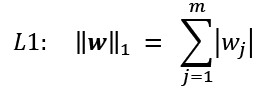

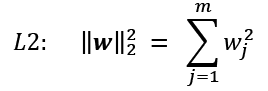

เราสามารถใช้ L1 หรือ L2 เป็น Penalty เติมลงไปใน Cost Function เช่น หากพิจารณา SSE (Sum Square Error) ซึ่งเป็น Cost Function ใน Adaline เราสามารถพล็อต Contour ของ Cost Function ได้ดังรูปนี้

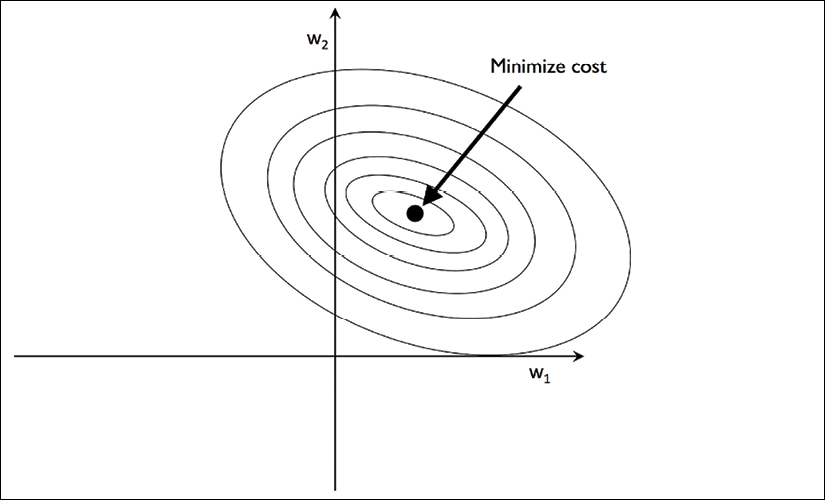

หากเติม L2 Penalty ลงไปใน Cost Function และใช้ $\lambda$ (Regularization Parameter) ผลลัพธ์ที่ได้จะทำให้ w1 และ w2 มีค่าเปลี่ยนไป เช่น 

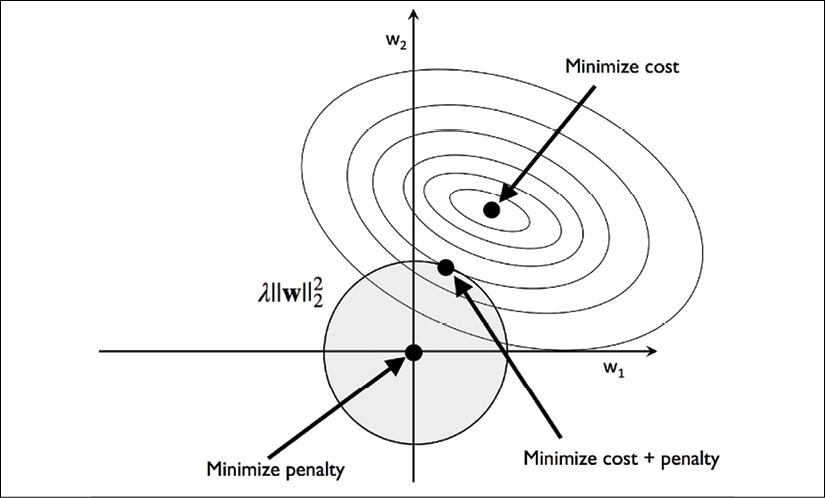



สำหรับ L1 ซึ่งใช้ผลบวกของค่าสัมบูรณ์ของ w ทำให้ Penalty มีลักษณะสี่เหลี่ยมดังรูป

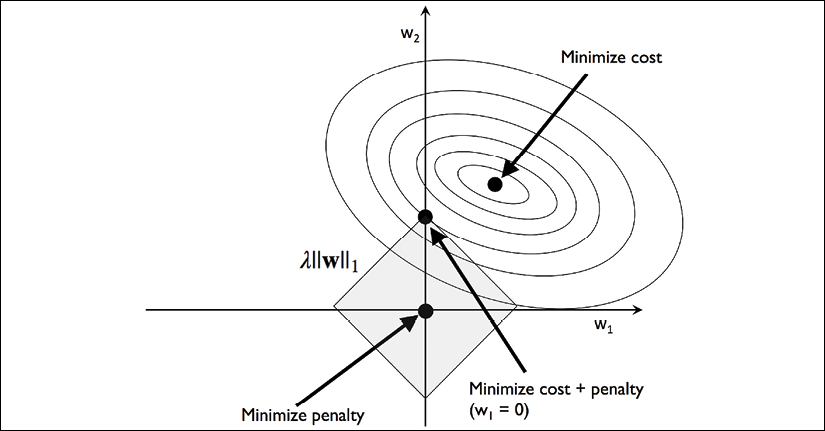

สังเกตว่า จุดตัดของวงรี ซึ่งเป็นค่าของ Cost Function ปกติกับกราฟสี่เหลี่ยมที่เป็นค่า Penalty ตัดกันหลายที่ แต่จุดตัดที่ทำให้ Cost Function ต่ำสุดมีแนวโน้มที่จะบนแกน ในกรณีรูปตัวอย่างนี้คือ อยู่บนแกน w2 นั่นหมายถึง w1 มีค่าเป็น 0

ในกรณีตัวอย่างนี้ เราพิจารณาเฉพาะข้อมูลที่มีเพียง 2 คอลัมน์ (มีเฉพาะ w1 และ w2 เท่านั้น) เมื่อใช้ L1 มีแนวโน้มจะทำให้ w1 มีค่าเป็น 0 นั่นหมายถึงไม่พิจารณาข้อมูลในคอลัมน์ 1 นั่นเอง 

หากข้อมูลมีมากกว่า 2 คอลัมน์ เมื่อใช้ L1 Penalty แล้วอาจทำให้เกิด Sparsity